<a id="title_ID"></a>
# JWST Pipeline Validation Notebook: 
# calwebb_coron3

<span style="color:red"> **Instruments Affected**</span>: MIRI, NIRCam 

### Table of Contents

<div style="text-align: left"> 
    
<br> [Introduction\*](#intro)
<br> [JWST CalWG Algorithm\*](#algorithm)
<br> [Test Description\*](#description)
<br> [Data Description\*](#data_descr)
<br> [Imports\*](#imports)
<br> [Set up Temporary Directory\*](#temp)
<br> [Loading the Data\*](#data_load)
<br> [Run the Pipeline](#pipeline)
<br> [Perform Tests or Visualization](#testing) 
<br> [About This Notebook\*](#about)
<br>    

</div>

<a id="intro"></a>
# Introduction

This notebook validates the stage 3 coronagraphic pipeline (calwebb_coron3).

Step description: https://jwst-pipeline.readthedocs.io/en/latest/jwst/pipeline/calwebb_coron3.html

Pipeline code: https://github.com/spacetelescope/jwst/tree/master/jwst/coron

[Top of Page](#title_ID)

<a id="algorithm"></a>
# JWST CalWG Algorithm

The coron3 pipeline consists of the following steps:

1) outlier_detection: identifies bad pixels/outliers in the input images

2) stack_refs: stacks the reference PSFs together into a 3D data cube

3) align_refs: aligns/shifts the stack of reference PSFs to the target PSFs

4) klip: uses the Karhunen-Loeve Image Plane (KLIP) algorithm to fit and subtract an optimal PSF from the target PSFs

5) resample: combines the PSF-subtracted target images into a single product

[Top of Page](#title_ID)

<a id="description"></a>
# Test Description

All steps of the calwebb_coron3 pipeline are run on the simulated input data.

The tests will ensure basic header/data info in the output images is as expected (e.g. image dimensions, number of outliers detected), as well as inspect the quality of the PSF alignments and the PSF-subtracted images.


[Top of Page](#title_ID)

<a id="data_descr"></a>
# Data Description

The NIRCam test data consists of 9 small-grid dithered reference PSFs (2 ints, 10 groups) as well as 1 target PSF (10 ints, 10 groups) with 2 companions. The instrument setup for these exposures is as follows:

DETECTOR = NRCA2

SUBARRAY = SUB640A210R

FILTER = F210M

PUPIL = MASKRND

CORONMSK = MASKA210R

READPATT = RAPID

[Top of Page](#title_ID)

<a id="imports"></a>
# Imports

* astropy.io for opening fits files
* ci_watson.artifactory_helpers to retrieve test data from artifactory
* glob for making file lists
* jwst.pipeline.calwebb_coron3 is the pipeline step being tested
* matplotlib.pyplot to generate plots
* os for file handling
* tempfile to create a temporary processing directory


In [1]:
from astropy.io import fits
from ci_watson.artifactory_helpers import get_bigdata
import glob
from jwst.pipeline.calwebb_coron3 import Coron3Pipeline
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
from tempfile import TemporaryDirectory

[Top of Page](#title_ID)

<a id="temp"></a>
# Set up Temporary Directory


In [2]:
# Create a temporary directory to hold notebook output, and change the working directory to that directory

data_dir = TemporaryDirectory()
os.chdir(data_dir.name)

[Top of Page](#title_ID)

<a id="data_load"></a>
# Loading the Data

In [3]:
# Copy the test files from Artifactory into the temporary directory

files = ['lib_ss20_sgd1_calints.fits', 'lib_ss20_sgd2_calints.fits', 'lib_ss20_sgd3_calints.fits',
         'lib_ss20_sgd4_calints.fits', 'lib_ss20_sgd5_calints.fits', 'lib_ss20_sgd6_calints.fits',
         'lib_ss20_sgd7_calints.fits', 'lib_ss20_sgd8_calints.fits', 'lib_ss20_sgd9_calints.fits',
         'lib_ss20_target_roll1_calints.fits', 'coro_test.asn']
for f in files:
    file = get_bigdata('jwst_validation_notebooks',
                       'validation_data',
                       'calwebb_coron3',
                       'coron3_nircam_test', f)

[Top of Page](#title_ID)

<a id="pipeline"></a>
# Run the Pipeline

In [4]:
# Initialize the coron3 pipeline
m = Coron3Pipeline()
m.save_results = True

# Run the pipeline
m.run('coro_test.asn')

2021-02-11 20:10:53,904 - stpipe.Coron3Pipeline - INFO - Coron3Pipeline instance created.


2021-02-11 20:10:53,906 - stpipe.Coron3Pipeline.stack_refs - INFO - StackRefsStep instance created.


2021-02-11 20:10:53,907 - stpipe.Coron3Pipeline.align_refs - INFO - AlignRefsStep instance created.


2021-02-11 20:10:53,908 - stpipe.Coron3Pipeline.klip - INFO - KlipStep instance created.


2021-02-11 20:10:53,909 - stpipe.Coron3Pipeline.outlier_detection - INFO - OutlierDetectionStep instance created.


2021-02-11 20:10:53,911 - stpipe.Coron3Pipeline.resample - INFO - ResampleStep instance created.


2021-02-11 20:10:53,993 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline running with args ('coro_test.asn',).


2021-02-11 20:10:53,997 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'i2d', 'search_output_file': True, 'input_dir': '', 'steps': {'stack_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}, 'align_refs': {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}, 'klip': {'pre_hooks': [], 'post_hooks': [], 'output_file': No

2021-02-11 20:10:53,997 - stpipe.Coron3Pipeline - INFO - Starting calwebb_coron3 ...


2021-02-11 20:10:54,353 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd1_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,036 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,038 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,162 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd2_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,164 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,166 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,283 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd3_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,285 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,286 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,407 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd4_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,409 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,410 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,531 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd5_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,533 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,534 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,650 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd6_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,652 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,653 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,769 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd7_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,772 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,773 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:55,895 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd8_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:55,897 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:55,900 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:56,108 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_sgd9_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:56,110 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:56,111 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:56,281 - stpipe.Coron3Pipeline - INFO - Prefetching reference files for dataset: 'lib_ss20_target_roll1_calints.fits' reftypes = ['drizpars', 'psfmask']


2021-02-11 20:10:56,284 - stpipe.Coron3Pipeline - INFO - Prefetch for DRIZPARS reference file is '/grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits'.


2021-02-11 20:10:56,289 - stpipe.Coron3Pipeline - INFO - Prefetch for PSFMASK reference file is '/grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits'.


2021-02-11 20:10:57,379 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd1_calints.fits>,).


2021-02-11 20:10:57,380 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:10:57,387 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:10:57,466 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:10:57,515 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:10:57,747 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd1_c1001_crfints.fits


2021-02-11 20:10:57,748 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:10:57,832 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd2_calints.fits>,).


2021-02-11 20:10:57,834 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:10:57,841 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:10:57,913 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:10:57,961 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:10:58,190 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd2_c1001_crfints.fits


2021-02-11 20:10:58,190 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:10:58,275 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd3_calints.fits>,).


2021-02-11 20:10:58,276 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:10:58,283 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:10:58,356 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:10:58,404 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:10:58,632 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd3_c1001_crfints.fits


2021-02-11 20:10:58,632 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:10:58,717 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd4_calints.fits>,).


2021-02-11 20:10:58,719 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:10:58,725 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:10:58,799 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:10:58,848 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:10:59,075 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd4_c1001_crfints.fits


2021-02-11 20:10:59,076 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:10:59,160 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd5_calints.fits>,).


2021-02-11 20:10:59,162 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:10:59,169 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:10:59,242 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:10:59,290 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:10:59,534 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd5_c1001_crfints.fits


2021-02-11 20:10:59,535 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:10:59,628 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd6_calints.fits>,).


2021-02-11 20:10:59,629 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:10:59,636 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:10:59,712 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:10:59,767 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:10:59,995 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd6_c1001_crfints.fits


2021-02-11 20:10:59,996 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:11:00,084 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd7_calints.fits>,).


2021-02-11 20:11:00,085 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:11:00,092 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:11:00,165 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:11:00,214 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:11:00,444 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd7_c1001_crfints.fits


2021-02-11 20:11:00,445 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:11:00,530 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd8_calints.fits>,).


2021-02-11 20:11:00,532 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:11:00,538 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:11:00,612 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:11:00,660 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:11:00,889 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd8_c1001_crfints.fits


2021-02-11 20:11:00,890 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:11:00,975 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(2, 640, 640) from lib_ss20_sgd9_calints.fits>,).


2021-02-11 20:11:00,976 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:11:00,983 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 2 inputs


2021-02-11 20:11:01,056 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 2 images


2021-02-11 20:11:01,105 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:11:01,333 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_sgd9_c1001_crfints.fits


2021-02-11 20:11:01,334 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:11:01,419 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs running with args (<ModelContainer>,).


2021-02-11 20:11:01,420 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': ''}


2021-02-11 20:11:01,468 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 1 to output stack


2021-02-11 20:11:01,478 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 2 to output stack


2021-02-11 20:11:01,488 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 3 to output stack


2021-02-11 20:11:01,495 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 4 to output stack


2021-02-11 20:11:01,502 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 5 to output stack


2021-02-11 20:11:01,509 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 6 to output stack


2021-02-11 20:11:01,516 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 7 to output stack


2021-02-11 20:11:01,524 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 8 to output stack


2021-02-11 20:11:01,531 - stpipe.Coron3Pipeline.stack_refs - INFO -  Adding psf member 9 to output stack


2021-02-11 20:11:01,596 - stpipe.Coron3Pipeline.stack_refs - INFO - Step stack_refs done


2021-02-11 20:11:01,720 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_psfstack.fits


2021-02-11 20:11:01,965 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_calints.fits>,).


2021-02-11 20:11:01,966 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': True, 'skip': False, 'suffix': 'c1001_crfints', 'search_output_file': False, 'input_dir': '', 'weight_type': 'exptime', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'nlow': 0, 'nhigh': 0, 'maskpt': 0.7, 'grow': 1, 'snr': '4.0 3.0', 'scale': '0.5 0.4', 'backg': 0.0, 'save_intermediate_results': False, 'resample_data': True, 'good_bits': '~DO_NOT_USE', 'scale_detection': False, 'allowed_memory': None}


2021-02-11 20:11:01,973 - stpipe.Coron3Pipeline.outlier_detection - INFO - Performing outlier detection with 10 inputs


2021-02-11 20:11:02,249 - stpipe.Coron3Pipeline.outlier_detection - INFO - Generating median from 10 images


2021-02-11 20:11:02,444 - stpipe.Coron3Pipeline.outlier_detection - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(a, func=_nanmedian, axis=axis, out=out,



2021-02-11 20:11:03,287 - stpipe.Coron3Pipeline.outlier_detection - INFO - Saved model in lib_ss20_target_roll1_c1001_crfints.fits


2021-02-11 20:11:03,288 - stpipe.Coron3Pipeline.outlier_detection - INFO - Step outlier_detection done


2021-02-11 20:11:03,400 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <CubeModel(18, 640, 640) from coro_test_psfstack.fits>).


2021-02-11 20:11:03,402 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'median_box_length': 3, 'bad_bits': 'DO_NOT_USE'}


2021-02-11 20:11:03,415 - stpipe.Coron3Pipeline.align_refs - INFO - Using PSFMASK reference file /grp/crds/cache/references/jwst/jwst_nircam_psfmask_0049.fits


2021-02-11 20:11:03,537 - stpipe.Coron3Pipeline.align_refs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,



2021-02-11 20:11:03,538 - stpipe.Coron3Pipeline.align_refs - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)



2021-02-11 20:11:03,539 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,547 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,556 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,564 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,573 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,581 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,590 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,598 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,607 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,615 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,624 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,632 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,641 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,649 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,657 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,666 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,674 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,683 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,688 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,688 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,733 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,737 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,745 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,758 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,764 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,778 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,790 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,825 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,831 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,838 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,838 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,838 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,839 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,846 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,887 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,892 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,928 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,955 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,956 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,985 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,986 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,986 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,986 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,987 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:03,987 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,011 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,025 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,039 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,065 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,075 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,077 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,138 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,139 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,139 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,140 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,153 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,175 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,196 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,197 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,208 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,216 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,225 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,280 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,281 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,281 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,299 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,338 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,360 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,417 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,418 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,418 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,419 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,419 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,420 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,447 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,489 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,503 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,531 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,556 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,557 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,557 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,573 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,574 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,580 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,592 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,612 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,628 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,637 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,691 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,692 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,692 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,693 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,693 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,694 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,694 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,695 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,754 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,783 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,811 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,821 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,839 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,840 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,840 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,841 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,869 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,874 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,887 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,910 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,927 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,944 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,969 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,986 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,986 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,987 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:04,987 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:05,044 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:05,057 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:05,062 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:05,066 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:05,089 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:11:05,108 - stpipe.Coron3Pipeline.align_refs - WARNING - Median filter returned NaN setting value to 0.


2021-02-11 20:14:26,023 - stpipe.Coron3Pipeline.align_refs - INFO - Step align_refs done


2021-02-11 20:14:27,151 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfalign.fits


2021-02-11 20:14:27,265 - stpipe.Coron3Pipeline.klip - INFO - Step klip running with args (<CubeModel(10, 640, 640) from lib_ss20_target_roll1_c1001_crfints.fits>, <QuadModel(10, 18, 640, 640) from lib_ss20_target_roll1_c1001_psfalign.fits>).


2021-02-11 20:14:27,266 - stpipe.Coron3Pipeline.klip - INFO - Step klip parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'truncate': 50}


2021-02-11 20:14:27,274 - stpipe.Coron3Pipeline.klip - INFO - KL transform truncation = 50


2021-02-11 20:14:32,006 - stpipe.Coron3Pipeline.klip - INFO - Step klip done


2021-02-11 20:14:32,273 - stpipe.Coron3Pipeline - INFO - Saved model in lib_ss20_target_roll1_c1001_psfsub.fits


2021-02-11 20:14:32,701 - stpipe.Coron3Pipeline.resample - INFO - Step resample running with args (<ModelContainer>,).


2021-02-11 20:14:32,703 - stpipe.Coron3Pipeline.resample - INFO - Step resample parameters are: {'pre_hooks': [], 'post_hooks': [], 'output_file': None, 'output_dir': None, 'output_ext': '.fits', 'output_use_model': False, 'output_use_index': True, 'save_results': False, 'skip': False, 'suffix': None, 'search_output_file': True, 'input_dir': '', 'pixfrac': 1.0, 'kernel': 'square', 'fillval': 'INDEF', 'weight_type': 'exptime', 'pixel_scale_ratio': 1.0, 'single': False, 'blendheaders': False, 'allowed_memory': None}


2021-02-11 20:14:32,722 - stpipe.Coron3Pipeline.resample - INFO - Drizpars reference file: /grp/crds/cache/references/jwst/jwst_nircam_drizpars_0001.fits


2021-02-11 20:14:33,117 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:33,479 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:33,630 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:33,983 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:34,127 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:34,481 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:34,626 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:34,978 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:35,123 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:35,478 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:35,624 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:35,977 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:36,123 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:36,480 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:36,627 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:36,981 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:37,127 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:37,482 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/jwst/transforms/models.py:610: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  matrix = np.zeros((3, 3), dtype=np.float)



2021-02-11 20:14:37,628 - stpipe.Coron3Pipeline.resample - INFO - Drizzling (640, 640) --> (756, 753)


2021-02-11 20:14:37,893 - stpipe.Coron3Pipeline.resample - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/gwcs/utils.py:72: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indx = np.asarray(np.floor(np.asarray(value) + 0.5), dtype=np.int)



2021-02-11 20:14:37,895 - stpipe.Coron3Pipeline.resample - INFO - Update S_REGION to POLYGON ICRS  346.825736745 21.254563694 346.825708926 21.260995901 346.818843479 21.260969972 346.818871598 21.254537767


2021-02-11 20:14:37,897 - stpipe.Coron3Pipeline.resample - INFO - Step resample done


2021-02-11 20:14:38,907 - stpipe.Coron3Pipeline - INFO - Saved model in coro_test_i2d.fits


2021-02-11 20:14:38,909 - stpipe.Coron3Pipeline - INFO - ...ending calwebb_coron3


2021-02-11 20:14:38,909 - stpipe.Coron3Pipeline - INFO - Step Coron3Pipeline done


[Top of Page](#title_ID)

<a id="testing"></a>
# Perform Tests

In [5]:
# Make sure the PSF stack/alignment/subtraction images have the expected data dimensions.
# The expected dimensions for the psf stack images are:
# NX x NY x Number of Reference PSF INTS
# The expected dimensions for the psf alignment images are:
# NX x NY x Number of Reference PSF INTS x Number of Target INTS
# The expected dimensions for the psf subtraction images are:
# NX x NY x Number of Target INTS

f_stack = 'coro_test_psfstack.fits'
f_align = 'lib_ss20_target_roll1_c1001_psfalign.fits'
f_sub = 'lib_ss20_target_roll1_c1001_psfsub.fits'
files = [f_stack, f_align, f_sub]
expected_shapes = [(18, 640, 640), (10, 18, 640, 640), (10, 640, 640)]
for f,shape in zip(files, expected_shapes):
    for ext in ['SCI', 'ERR', 'DQ']:
        data = fits.getdata(f, ext)
        if data.shape != shape:
            print('WARNING: unexpected data shape in {} {}: {}'.format(f, ext, data.shape))

2021-02-11 20:14:38,917 - stpipe - WARNING - /data1/jenkins/workspace/Notebooks/jwst_validation_notebooks_spacetelescope/miniconda3/envs/jwst_validation_notebooks/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



In [6]:
# Make sure a reasonable number of outlier pixels are flagged in each exposure (less than 1%)

files = sorted(glob.glob('*crfints.fits'))
for f in files:
    print(os.path.basename(f))
    dq = fits.getdata(f, 'DQ')
    nints, ny, nx = dq.shape
    for integration in range(nints):
        dq_int = dq[integration]
        n_outlier = len(dq_int[dq_int&16!=0])
        print('\tOutlier pixels in Int {}: {} ({:.5f}% of image)'.format(integration+1,
              n_outlier, n_outlier/(ny*nx)*100))

lib_ss20_sgd1_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 5 (0.00122% of image)
lib_ss20_sgd2_c1001_crfints.fits
	Outlier pixels in Int 1: 3 (0.00073% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd3_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd4_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 5 (0.00122% of image)
lib_ss20_sgd5_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd6_c1001_crfints.fits
	Outlier pixels in Int 1: 4 (0.00098% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd7_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels in Int 2: 4 (0.00098% of image)
lib_ss20_sgd8_c1001_crfints.fits
	Outlier pixels in Int 1: 5 (0.00122% of image)
	Outlier pixels 

Text(0, 0.5, 'PSF - Mean PSF [MJy/sr]')

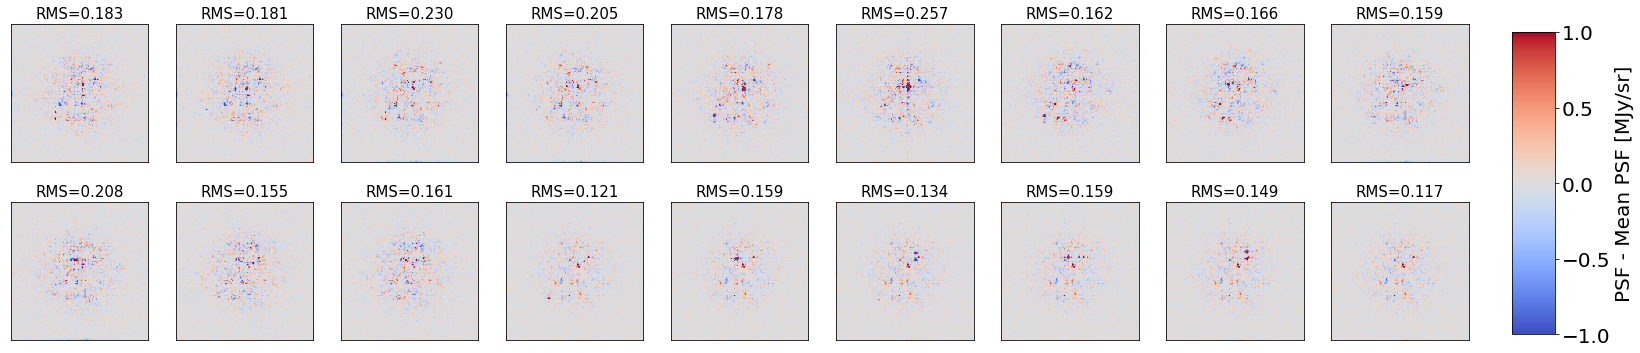

In [7]:
# Make sure the PSFs were aligned properly (i.e. residual alignment RMS should be <0.5 MJr/sr). 
# Each frame represents one PSF-aligned reference integration. There shouldn't be any severe "ringing" 
# effect from outlier pixels (i.e. cross pattern), as these should have been corrected in earlier steps.
# There also shouldn't be any PSF pattern offsets visible in the images, only salt/pepper noise.

fig, axes = plt.subplots(2, 9, figsize=(30,6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_align, 'SCI')
mean = np.mean(data[0], axis=0)
for i, ax in enumerate(axes.flatten()):
    diff = data[0, i] - mean
    diff = diff[y1:y2, x1:x2]
    r = np.sqrt(np.mean(diff**2))
    im = ax.imshow(diff, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_title('RMS={:.3f}'.format(r),size=15)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('PSF - Mean PSF [MJy/sr]', size=20)

Text(0, 0.5, 'Residual PSF [MJy/sr]')

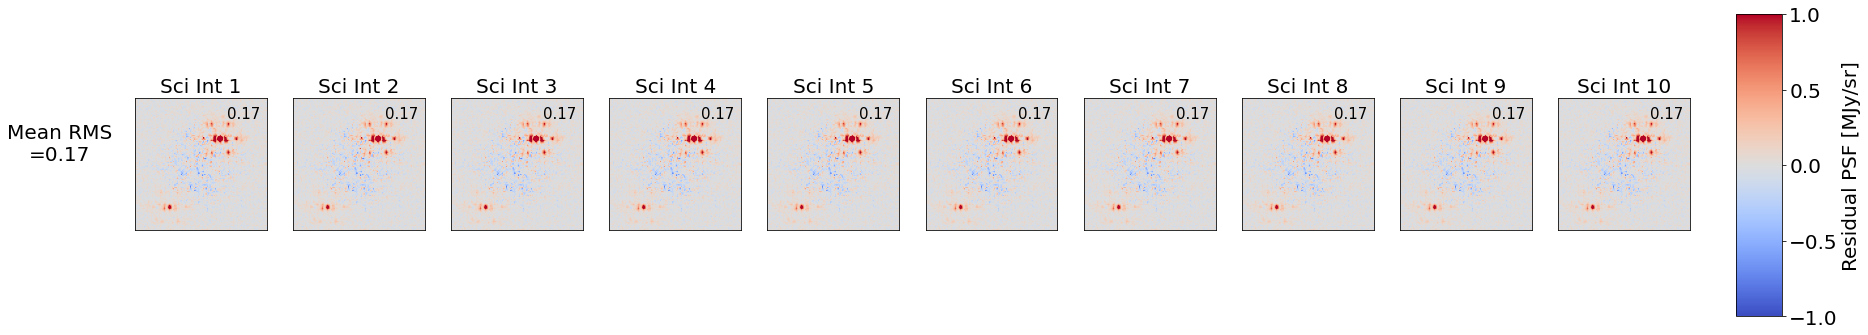

In [8]:
# Make sure the PSF fitting/subtraction worked properly. The 2 companions should be obviously visible
# in red in the top right/bottom left of the image, and the remainder of the image should be ~gray 
# (i.e. residual RMS should be <0.5 MJy/sr).

fig, axes = plt.subplots(1,10, figsize=(32, 6))
y1, y2, x1, x2 = (269, 370, 269, 370)  # a cutout region around the PSF

data = fits.getdata(f_sub, 'SCI')
rms = []
for i, ax in enumerate(axes):
    d = data[i, y1:y2, x1:x2]
    r = np.sqrt(np.mean(d**2))
    im = ax.imshow(d, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
    ax.set_title('Sci Int {}'.format(i+1), size=20)
    ax.set_yticks([])
    ax.set_xticks([])
    rms.append(r)
    ax.text(70, 85, '{:.2f}'.format(r), size=15)
axes[0].set_ylabel('Mean RMS\n={:.2f}'.format(np.mean(rms)), size=20, rotation='horizontal', labelpad=75)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im, cax=cbar_ax)
cbar.ax.tick_params(labelsize=20) 
cbar.ax.set_ylabel('Residual PSF [MJy/sr]', size=20)

Text(0.5, 1.0, 'Residual RMS=0.101')

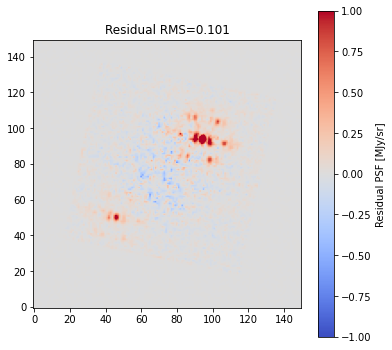

In [9]:
# Make sure the final, combined PSF-subtracted image looks good as well (should just look like 
# a cleaner combination of the above, with residual RMS <0.15)

plt.figure(figsize=(6, 6))
data = fits.getdata('coro_test_i2d.fits', 'SCI')
data = data[300:450, 300:450]
plt.imshow(data, cmap='coolwarm', vmin=-1, vmax=1, origin='lower')
plt.colorbar(label='Residual PSF [MJy/sr]')
rms = np.sqrt(np.mean(data**2))
plt.title('Residual RMS={:.3f}'.format(rms))

[Top of Page](#title_ID)

<a id="about"></a>
## About this Notebook
**Author:** Ben Sunnquist, Staff Scientist, NIRCam
<br>**Updated On:** 02/10/2021

[Top of Page](#title_ID)
<img style="float: right;" src="./stsci_pri_combo_mark_horizonal_white_bkgd.png" alt="stsci_pri_combo_mark_horizonal_white_bkgd" width="200px"/> 